# TP N° 1: Análisis Exploratorio de Datos
## Heart Diseases Dataset
Este conjunto de datos es una versión avanzada del clásico conjunto de datos de enfermedades cardíacas de UCI Machine Learning, enriquecido con más características para soportar análisis más sofisticados.

## 1- Listado de variables y selección 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import h5py
import PIL
import seaborn as sns
import plotly
import sklearn_pandas
import plotly.express as px
from sklearn.feature_selection import mutual_info_classif

In [2]:
data = pd.read_csv('./heart_disease_data_with_features.csv')

In [3]:
data.shape
# Muestra las dimensiones del dataframe

(303, 36)

In [4]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
5,56,1,2,120,236,0,0,178,0,0.8,...,1.950413,0.948670,-0.435528,247.424000,-58,-2.034400,13216,2566.048,6720,15.308770
6,62,0,4,140,268,0,2,160,0,3.6,...,1.900709,0.908251,2.485868,260.024691,-108,9.567901,16616,2882.560,8680,14.093395
7,57,0,4,120,354,0,0,163,1,0.6,...,2.925620,0.868488,-0.252941,247.424000,-191,-1.234400,20178,3484.614,6840,15.819108
8,63,1,4,130,254,0,2,147,0,1.4,...,1.938931,0.901818,0.477408,260.024691,-107,0.767901,16002,2543.394,8190,13.878265
9,53,1,4,140,203,1,2,155,1,3.1,...,1.439716,0.949557,2.029400,247.424000,-48,8.765600,10759,1884.645,7420,15.426704


In [5]:
# Dividimos por las columnas de interes
subset = data.loc[:, ['sex','cp','fbs','restecg','thalach', 'exang','oldpeak','slope', 'ca','thal', 'num','age_group', 'cholesterol_level', 'bp_level','risk_score', 'symptom_severity', 'risk_factor', 'avg_chol_by_age_group']]
subset.describe()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000,302.000000
mean,0.679868,3.158416,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,14.844073,3.508251,19.733887,246.834437
std,0.467299,0.960126,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,4.073047,4.381467,28.421998,10.493973
min,0.000000,1.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.216000,0.000000,0.000000,219.785714
25%,0.000000,3.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,12.080000,0.000000,0.000000,235.847222
50%,1.000000,3.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.392000,1.800000,7.200000,247.424000
75%,1.000000,4.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,17.181000,5.500000,28.800000,260.024691
max,1.000000,4.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.938000,24.800000,173.600000,260.024691


In [6]:
subset.head(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.0,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.0,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.0,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.0,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.0,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
5,1,2,0,0,178,0,0.8,1,0.0,3.0,0,50s,normal,low,14.416,1.6,4.8,247.424000
6,0,4,0,2,160,0,3.6,3,2.0,3.0,3,60s,high,normal,18.016,14.4,43.2,260.024691
7,0,4,0,0,163,1,0.6,1,0.0,3.0,0,50s,high,low,21.378,2.4,7.2,247.424000
8,1,4,0,2,147,0,1.4,2,1.0,7.0,2,60s,high,normal,17.302,5.6,39.2,260.024691
9,1,4,1,2,155,1,3.1,3,0.0,7.0,1,50s,normal,normal,12.159,12.4,86.8,247.424000


In [7]:
# Mostramos los tipos de datos
subset.dtypes

sex                        int64
cp                         int64
fbs                        int64
restecg                    int64
thalach                    int64
exang                      int64
oldpeak                  float64
slope                      int64
ca                       float64
thal                     float64
num                        int64
age_group                 object
cholesterol_level         object
bp_level                  object
risk_score               float64
symptom_severity         float64
risk_factor              float64
avg_chol_by_age_group    float64
dtype: object

In [8]:
# Elije 10 filas al azar del DataFrame
subset.sample(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
273,0,4,0,0,125,0,1.6,2,0.0,3.0,0,70s,low,low,11.699,6.4,19.2,249.600000
204,1,4,0,0,161,0,0.0,1,0.0,7.0,0,40s,normal,low,10.173,0.0,0.0,235.847222
280,1,4,0,0,143,1,3.0,2,1.0,7.0,2,50s,high,low,20.195,12.0,84.0,247.424000
88,0,4,0,2,160,0,0.0,1,0.0,3.0,0,50s,normal,normal,13.782,0.0,0.0,247.424000
117,0,4,0,0,182,0,1.4,1,0.0,3.0,0,30s,low,normal,7.785,5.6,16.8,219.785714
43,1,3,1,0,157,0,1.6,1,0.0,3.0,0,50s,normal,high,14.008,4.8,14.4,247.424000
115,1,2,0,0,132,0,0.0,2,0.0,6.0,0,40s,normal,normal,9.673,0.0,0.0,235.847222
176,1,4,1,0,147,0,0.1,1,3.0,7.0,0,50s,normal,low,13.196,0.4,2.8,247.424000
46,1,3,0,0,123,0,0.6,1,0.0,3.0,0,50s,low,low,10.025,1.8,5.4,247.424000
81,0,4,0,2,143,0,0.4,2,0.0,3.0,0,50s,high,normal,15.292,1.6,4.8,247.424000


In [9]:
fig = px.box(subset, y='thalach', )
fig.show()

Analizando la variable "thalach" podemos ver que uno de los registros que tiene es atípico. Este registro va a ser eliminado porque puede perjudicar el modelo. 

In [10]:
result = subset[subset['thalach'] == 71]
result.head()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
245,1,4,0,0,71,0,1.0,2,0.0,3.0,2,60s,normal,low,17.079,4.0,12.0,260.024691


In [11]:
subset = subset.drop(index=245)

In [12]:
fig = px.box(subset, y='thalach', )
fig.show()

Con el gráfico en barras podemos deducir que en la mayoria de datos del subconjunto es 0, es decir, que no se detectaron enfermedades. Y luego la cantidad de casos donde se empieza a detectar enfermedades se encuentran escalonadas, yendo desde el 1 (enfermedad leve) hasta 4 (enfermedad grave).

## 2- Análisis detallado de un conjunto de variables

### Variables Nulos
Estos son los valores nulos encontrados en el subset de datos:

In [13]:
subset.isnull().sum()

sex                      0
cp                       0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
age_group                1
cholesterol_level        1
bp_level                 2
risk_score               0
symptom_severity         0
risk_factor              2
avg_chol_by_age_group    1
dtype: int64

#### Tratamiento de valores nulos

**Variables:**
- **ca: numerica**
- **thal: numerica**
- **age_group: cualitativa**
- **cholesterol_level: cualitativa**
- **bp_level: cualitativa**
- **risk_factor: numerica**
- **avg_chol_by_age_group: numerica**

Para las variables numericas, el tratamiento que llevaremos a cabo sera rellenar con la media
Para las variables cualitativas, el tratamiento será rellenar con el valor que mas se repite

#### tratamiento de valores nulos de 'ca'

In [14]:
subset['ca'] = subset['ca'].fillna(subset['ca'].mean())
subset['ca'].isnull().sum()

0

#### tratamiento de valores nulos de 'thal'

In [15]:
subset[subset['thal'].isna()]

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
87,0,3,0,2,115,0,0.0,1,0.0,NaN,0,50s,normal,normal,12.728,0.0,NaN,247.424
266,1,4,1,0,156,1,1.0,2,0.0,NaN,2,50s,normal,normal,11.888,4.0,NaN,247.424


In [16]:
subset['thal'] = subset['thal'].fillna(subset['thal'].mean())
subset['thal'].isnull().sum()

0

#### tratamiento de valores nulos de 'age_group'

In [17]:
subset['age_group'] = subset['age_group'].fillna(subset['age_group'].mode()[0])
subset['age_group'].isnull().sum()

0

#### tratamiento de valores nulos de 'cholesterol level'

In [18]:
subset['cholesterol_level'] = subset['cholesterol_level'].fillna(subset['cholesterol_level'].mode()[0])
subset['cholesterol_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'bp_level'

In [19]:
subset['bp_level'] = subset['bp_level'].fillna(subset['bp_level'].mode()[0])
subset['bp_level'].isnull().sum()

0

#### tratamiento de valores nulos de 'risk_factor'

In [20]:
subset['risk_factor'] = subset['risk_factor'].fillna(subset['risk_factor'].mean())
subset['risk_factor'].isnull().sum()

0

#### tratamiento de valores nulos de 'avg_chol_by_age_group'

In [21]:
subset['avg_chol_by_age_group'] = subset['avg_chol_by_age_group'].fillna(subset['avg_chol_by_age_group'].mean())
subset['avg_chol_by_age_group'].isnull().sum()

0

In [22]:
# ESTO PUEDE JUNTARSE EN DOS CELDAS, UNA CON LAS NUMERICAS Y OTRA CON LAS CUALITATIVAS

### Variable de salida
**num** 

<Axes: title={'center': 'num'}, xlabel='num'>

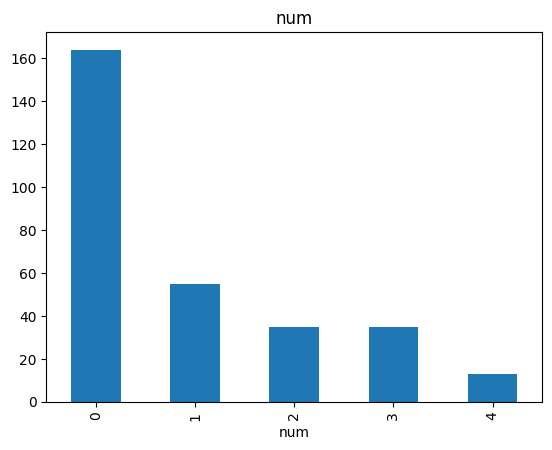

In [23]:
subset.num.value_counts().plot.bar(title='num')

In [24]:
subset.num.value_counts()

num
0    164
1     55
2     35
3     35
4     13
Name: count, dtype: int64

In [25]:
len(subset)

302

Podemos observar en el grafico que de la variable **num** se encuentra dividida en los siguientes porcentajes:
- **0 - 55,21%**
- **1 - 18.51%**
- **2 - 11.78%**
- **3 - 11.78%**
- **4 - 4.37%**

Esto nos indica que el 55% de las personas no se detectaron enfermedades cardiacas, y el resto, el 45% indica que hay enfermedad cardiaca entre sus diferentes gravedades. Esto nos muestra que hay una tendencia en la cual mientras más grave sea la enfermedad cardiaca, menor es la cantidad de personas hay.

In [26]:
mean = subset['num'].mean()

std_dev = subset['num'].std()

print(f"Media: {mean}")
print(f"Desviación estándar: {std_dev}")

Media: 0.9337748344370861
Desviación estándar: 1.2290442721424581


Interpretación de la Media: Es 0.9337, lo que indica que el valor promedio de la variable es cercano a 1. Esto sugiere que la mayoría de los datos están en los valores más bajos (0 y 1), con algunos valores más altos contribuyendo a elevarla ligeramente.

Interpretación de la Desviación Estándar: Es 1.229, lo que nos indica cuánto se desvían los datos de la media, en promedio. Es relativamente alta en comparación con la media, lo que sugiere que hay una considerable variabilidad en los datos con una distribución sesgada hacia los valores más bajos (cercanos a 0). Esto es consistente con una distribución en la que hay pocos datos con valores altos (3 o 4), lo cual tiene sentido, dado que es más complejo tener mayor cantidad de registros de pacientes con mayor gravedad.

### Variables de entrada

Para trabajar de una manera mas entendible en el trabajo decidimos renombrar las mismas.

In [27]:
BETTER_COLUMN_NAMES = {
    'sex': 'sex',
    'cp': 'chest_pain',
    'fbs':'fasting_blood_sugar',
    'restecg':'rest_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_induced_angina',
    'oldpeak':'depression_induced_ex',
    'slope':'slope',
    'ca':'vessels_colored_fl',
    'thal':'thalassemia',
    'num':'diagnosis',
    'age_group':'age_group',
    'cholesterol_level':'cholesterol_level',
    'bp_level':'blood_pressure_level',
    'risk_score':'risk_score',
    'symptom_severity':'symptom_severity',
    'risk_factor':'risk_factor',
    'avg_chol_by_age_group':'avg_chol_by_age_group'
}

subset.rename(columns=BETTER_COLUMN_NAMES, inplace=True)

subset

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.000000,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.000000,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.000000,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.000000,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.000000,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,132,0,1.2,2,0.000000,7.0,1,40s,high,low,12.980,1.2,8.4,235.847222
299,1,4,1,0,141,0,3.4,2,2.000000,7.0,2,60s,low,high,14.564,13.6,95.2,260.024691
300,1,4,0,0,115,1,1.2,2,1.000000,7.0,3,50s,low,normal,8.767,4.8,33.6,247.424000
301,0,2,0,2,174,0,0.0,2,1.000000,3.0,1,50s,normal,normal,14.752,0.0,0.0,247.424000


In [28]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def preparar_datos_para_info_mutua(subset, target_column):
    # Hacer una copia del DataFrame para evitar cambios en el original
    subset_encoded = subset.copy()
    
    # Inicializar el LabelEncoder
    le = LabelEncoder()
    
    # Iterar por cada columna del DataFrame
    for column in subset_encoded.columns:
        # Si la columna es categórica (tipo object o string), la convertimos
        if subset_encoded[column].dtype == 'object':
            subset_encoded[column] = le.fit_transform(subset_encoded[column])
    
    return subset_encoded

def calcular_informacion_mutua(subset, target_column):
    # Preparar los datos codificando las variables categóricas
    subset_encoded = preparar_datos_para_info_mutua(subset, target_column)
    
    # Separar las variables independientes (X) y la variable objetivo (y)
    X = subset_encoded.drop(columns=[target_column])
    y = subset_encoded[target_column]
    
    # Calcular la información mutua entre cada variable y el objetivo
    info_mutua = mutual_info_classif(X, y, discrete_features='auto')
    
    # Crear un DataFrame con los resultados
    info_mutua_df = pd.DataFrame({
        'Variable': X.columns,
        'Informacion_Mutua': info_mutua
    })
    
    # Ordenar por la información mutua de mayor a menor
    info_mutua_df = info_mutua_df.sort_values(by='Informacion_Mutua', ascending=False)
    
    return info_mutua_df

# Ejemplo de uso:
# supongamos que 'subset' es tu DataFrame y 'diagnosis' es la variable objetivo
resultado_info_mutua = calcular_informacion_mutua(subset, 'diagnosis')
print(resultado_info_mutua)


                   Variable  Informacion_Mutua
15              risk_factor           0.190919
14         symptom_severity           0.189089
1                chest_pain           0.180631
8        vessels_colored_fl           0.164908
9               thalassemia           0.163599
5   exercise_induced_angina           0.151687
6     depression_induced_ex           0.121171
7                     slope           0.105810
4            max_heart_rate           0.080284
10                age_group           0.076071
0                       sex           0.045171
16    avg_chol_by_age_group           0.027528
3                  rest_ecg           0.019418
11        cholesterol_level           0.000000
12     blood_pressure_level           0.000000
13               risk_score           0.000000
2       fasting_blood_sugar           0.000000


**sex**

In [29]:
subset.sex.value_counts()

sex
1    205
0     97
Name: count, dtype: int64

<Axes: title={'center': 'Sex (1: Hombre 0: Mujer)'}, xlabel='sex'>

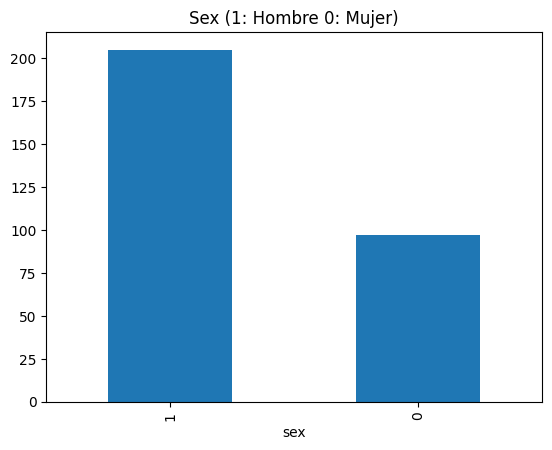

In [30]:
subset.sex.value_counts().plot.bar(title='Sex (1: Hombre 0: Mujer)')

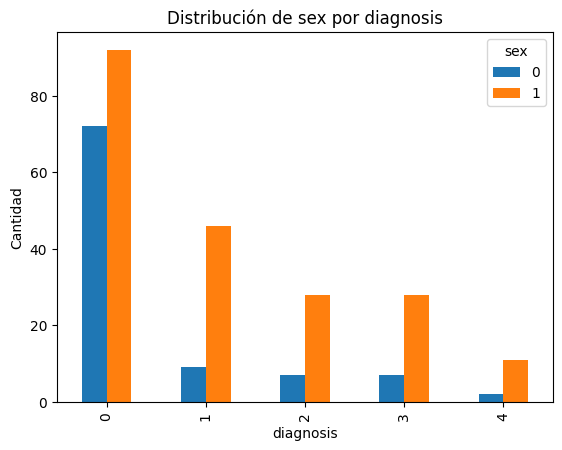

In [31]:
grouped_data = subset.groupby(['diagnosis', 'sex']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', title='Distribución de sex por diagnosis')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

Hay que considerar que los registros de sex se encuentra desbalaceados, siendo la cantidad de hombres en los registros de un 69.02% y de las mujeres el 32.65%, por lo que es evidente que el gráfico indique que los hombres son más propensos a contraer una enfermedad cardiaca. 

**Depression_induced_ex**

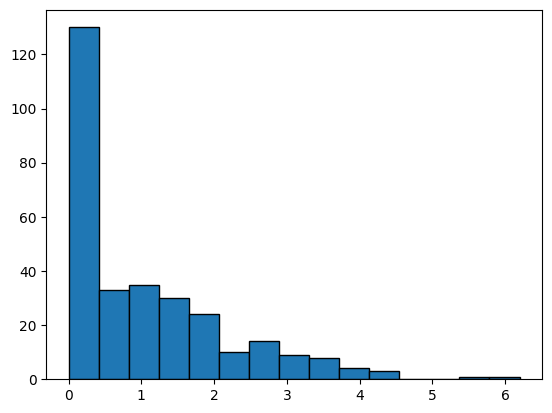

In [32]:
plt.hist(subset.depression_induced_ex, bins=15, edgecolor='black')
plt.show()

In [33]:
fig = px.box(subset, y='depression_induced_ex')
fig.show()

La variable representa la depresión inducida por el ejercicio en relación al reposo, lo que quiere decir que cuanto mas cercano a 0 sea mejor. Esto es así porque un corazón sano no debería esforzarse tanto para hacer ejercicio.

Podemos observar en el gráfico que, el 50% del total de los datos se encuentran entre 0 y 1,6.

Pero también podemos observar que hay valores aberrantes. A los mismos procedemos a dejarlos por las dudas, dado que el ámbito en el cual estamos trabajando es analizar que tan enferma está una persona del corazón, y estos casos aislados pueden darle mucha información al modelo.

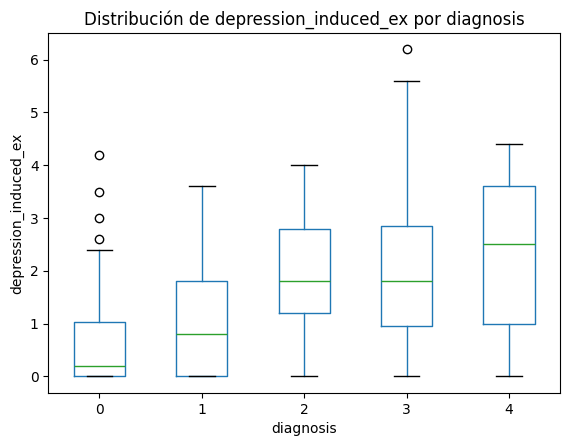

In [34]:
subset.boxplot(column='depression_induced_ex', by='diagnosis', grid=False)

plt.title('Distribución de depression_induced_ex por diagnosis')
plt.suptitle('')  
plt.xlabel('diagnosis')
plt.ylabel('depression_induced_ex')
plt.show() 

Las estadísticas muestran que la depresión inducida por el ejercicio aumenta a medida que el grupo de diagnóstico sube de 0 a 4. Los grupos con diagnósticos más altos (3 y 4) tienen valores promedio y desviaciones estándar más altos, indicando una mayor intensidad y variabilidad de la depresión inducida. En contraste, los grupos con diagnósticos más bajos (0 y 1) muestran menor intensidad y dispersión. Por lo tanto, hay una relación directamente proporcional entre el diagnóstico y la depresión inducida, con mayor severidad y variabilidad en los diagnósticos más altos.

#### Grupo Etáreo

<Axes: title={'center': 'Grupo etario'}, xlabel='age_group'>

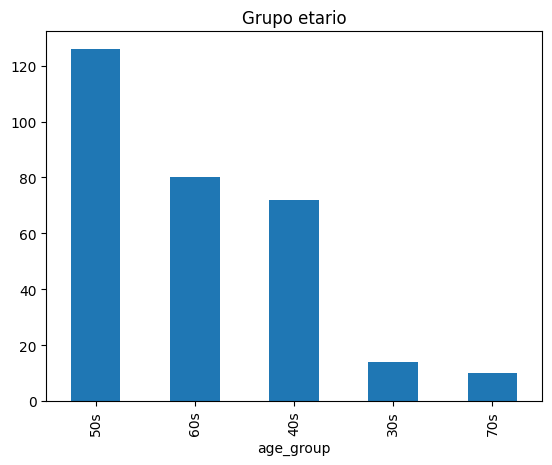

In [35]:
subset.age_group.value_counts().plot.bar(title='Grupo etario', )

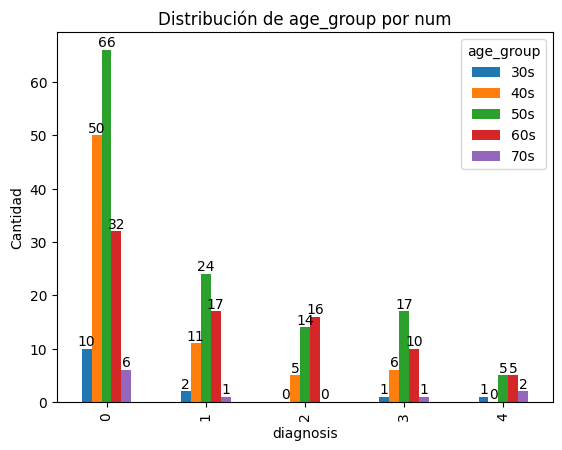

In [36]:
grouped_data = subset.groupby(['diagnosis', 'age_group']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de age_group por num')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [37]:
subset.age_group.value_counts()

age_group
50s    126
60s     80
40s     72
30s     14
70s     10
Name: count, dtype: int64

A simple vista observamos que el grupo etáreo de los **50s** es aquel que más destaca entre los diferentes valores de diagnosis, al igual que aquel grupo que se encuentra entre los **60s**.

**Porcentajes**
- **30s - 4.71%**
- **40s - 24.24%**
- **50s - 41.07%**
- **60s - 26.59%**
- **70s - 3.36%**

Con estos porcentajes observamos que los registros de las edades etarias se encuentra desbalanceados, siendo el grupo etáreo de 50s con el mayor porcentaje. 

Para hacer un análisis más profundo, sacamos la proporción de cada grupo etáreo en funcion con la gravedad de la enfermedad:

30s - Tienen un 71% en 0, un 14% en 1, un 0% en 2, un 7% en 3 y un 7% en 4. 

40s - Tienen un 69% en 0, un 15% en 1, un 7% en 2, un 8% en 3 y un 0% en 4. 

50s - Tienen un 52% en 0, un 19% en 1, un 11% en 2, un 13% en 3 y un 4% en 4. 

60s - Tienen un 40% en 0, un 21% en 1, un 20% en 2, un 13% en 3 y un 6% en 4. 

70s - Tienen un 60% en 0, un 10% en 1, un 0% en 2, un 10% en 3 y un 20% en 4. 

La distribución muestra que la gravedad de la enfermedad aumenta con la edad, especialmente a partir de los 50 años, donde se observa un mayor porcentaje de casos en niveles de gravedad moderada y severa. Los grupos más jóvenes (30s y 40s) presentan una mayoría de casos leves o sin enfermedad, mientras que en los grupos mayores (60s y 70s) se ve una mayor dispersión, con algunos individuos en niveles graves, especialmente en los 70s, donde un 20% alcanza el nivel más alto de severidad. Esto sugiere una relación clara entre la edad y la progresión de la enfermedad.


#### cp - Tipo de dolor de pecho

Es especialmente relevante en un contexto cardíaco, ya que el dolor en el pecho suele estar relacionado con el corazón. Esta clasificación es crucial para evaluar y diferenciar entre diferentes presentaciones clínicas que podrían indicar la presencia o ausencia de una condición cardíaca. 

Valores que puede tomar:

- 1: Angina típica -- suele estar relacionada con problemas coronarios significativos, por lo que es grave.

- 2: Angina atípica -- puede retrasar el tratamiento dado que es díficl de analizar, aunque en algunos casos puede no ser tan grave como la angina típica.

- 3: Dolor no anginal -- este tipo de dolor no suele estar relacionado con el corazón, lo que lo hace menos grave desde el punto de vista cardíaco.

- 4: Asintomático -- al no haber dolor ni otras señales de advertencia, el problema puede pasar desapercibido y no tratarse a tiempo, lo que aumenta el riesgo de complicaciones como infartos en pacientes que estan enfermos. Pero también aquellos que estén sanos entran en esta categoría.

Según lo investigado, el asíntomatico puede ser bueno o muy grave, dado que no asegura que una persona no está enferma, ya que puede desarrollarse una enfermedad cardíaca sin presentar síntomas. 

La pregunta que haríamos es: ¿cómo tomamos los registros asintomáticos, cómo algo bueno o malo? Es decir, ¿cuánto mayor es el valor de estos resultados, menos probabilidades de tener una enfermedad grave? ¿O están desordenados?

<Axes: title={'center': 'Tipo de dolor de pecho'}, xlabel='chest_pain'>

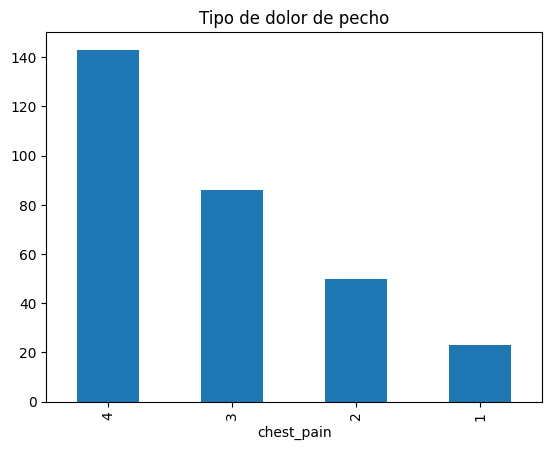

In [38]:
subset.chest_pain.value_counts().plot.bar(title='Tipo de dolor de pecho')

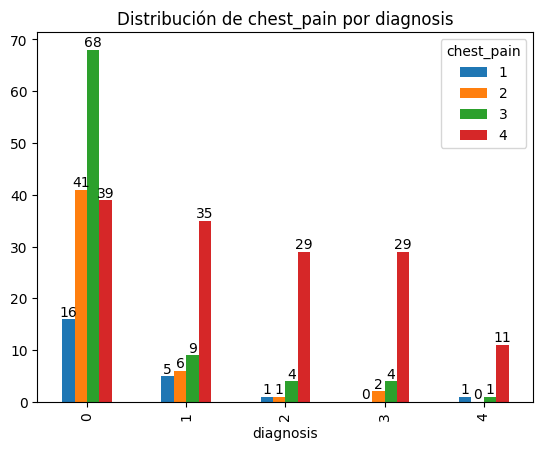

In [39]:
grouped_data = subset.groupby(['diagnosis', 'chest_pain']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de chest_pain por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

In [40]:
subset.chest_pain.value_counts()

chest_pain
4    143
3     86
2     50
1     23
Name: count, dtype: int64

A simple vista se puede observar que no importa el tipo de dolor de pecho para poder deducir si hay alguna enfermedad cardiaca. Se ve en el gráfico que aquellos pacientes asintomáticos (4) se encuentran distribuidos entre todas las variables del diagnosis, lo que cumple con lo descrito anteriormente, puede ser bueno o malo según el caso. 

**Porcentaje de chest_pain**
- **4 - 46.80%**
- **3 - 28.95%**
- **2 - 16.83%**
- **1 - 7.40%**

#### fbs - Azúcar en sangre en ayunas > 120 mg/dl

<Axes: title={'center': 'Azúcar en sangre > 120ml/dl'}, xlabel='fasting_blood_sugar'>

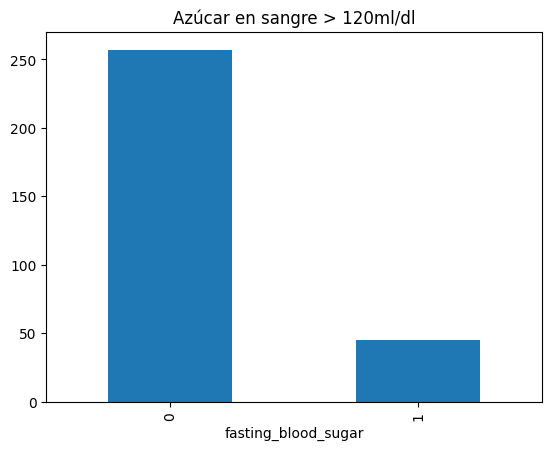

In [41]:
subset.fasting_blood_sugar.value_counts().plot.bar(title='Azúcar en sangre > 120ml/dl')

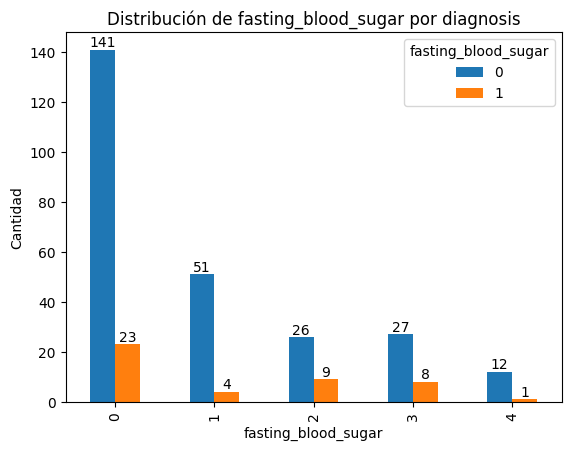

In [42]:
grouped_data = subset.groupby(['diagnosis', 'fasting_blood_sugar']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de fasting_blood_sugar por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('fasting_blood_sugar')
plt.ylabel('Cantidad')
plt.show()

In [43]:
subset.fasting_blood_sugar.value_counts()

fasting_blood_sugar
0    257
1     45
Name: count, dtype: int64

**Valores de fasting_blood_sugar**
- 0: No hay más de 120 mg/dl de azúcar en sangre.
- 1: Hay más de 120 mg/dl de azúcar en sangre. 

**Proporción:**
- 0: 0 es 55%; 1 es el 20%; 2 es 10%; 3 es 10%; 4 es 5%.
- 1: 0 es 51%; 1 es el 9%; 2 es 20%; 3 es 18%; 4 es 2%.

El grupo con fasting_blood_sugar mayor de 120 mg/dl tiende a tener una mayor proporción de casos con diagnosis 2 y 3, lo que sugiere que altos niveles de azúcar en sangre están correlacionados con una mayor gravedad de la enfermedad cardíaca, aunque no necesariamente en los casos más críticos (diagnosis 4). Esto respalda la relación conocida entre la hiperglucemia y el riesgo de complicaciones cardíacas.

#### restecg - Resultado electrocardiográfico en reposo

<Axes: title={'center': 'rest_ecg'}, xlabel='rest_ecg'>

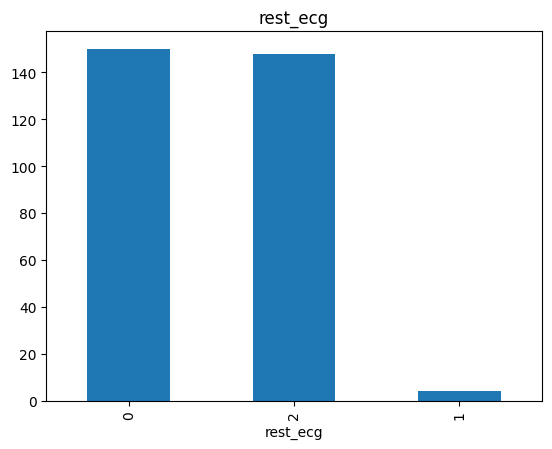

In [44]:
subset.rest_ecg.value_counts().plot.bar(title='rest_ecg')

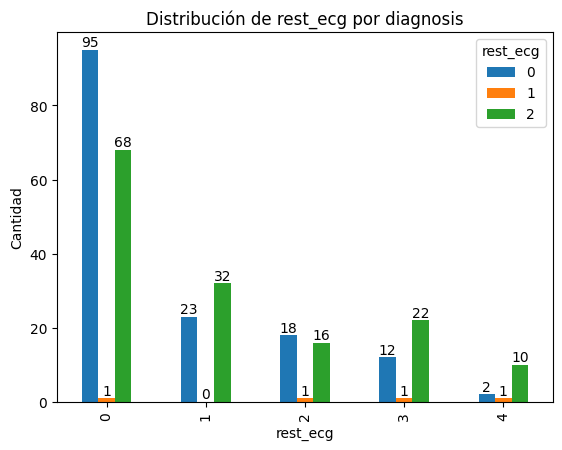

In [45]:
grouped_data = subset.groupby(['diagnosis', 'rest_ecg']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de rest_ecg por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('rest_ecg')
plt.ylabel('Cantidad')
plt.show()

**Valores**

- 0 (Normal): Sin problemas evidentes.
- 1 (ST-T anomalía): Podría indicar problemas de oxigenación del corazón o daño en el músculo cardíaco.
- 2 (Hipertrofia ventricular izquierda): Señala un posible agrandamiento del ventrículo izquierdo, generalmente relacionado con presión arterial alta y asociado a mayor riesgo de enfermedad cardíaca.

Se observa que aumenta la gravedad de la enfermedad cardiaca (diagnosis) es mayor la hipertrofia ventricular izquierda probable o definitiva (rest_ecg - 2), esto nos dice que es más proble de contraer una enfermedad cardiaca grave. 

#### exang - angina inducida por el ejercicio

<Axes: title={'center': 'exang'}, xlabel='exercise_induced_angina'>

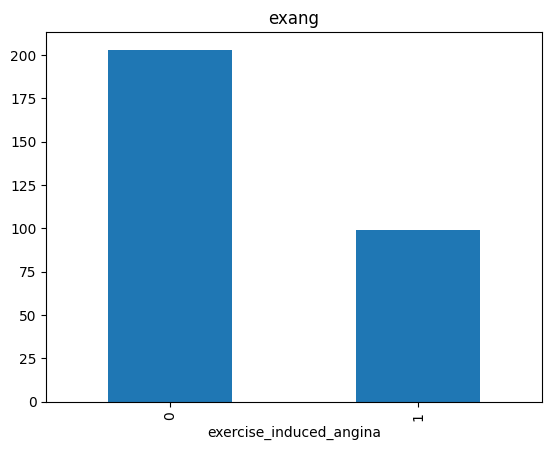

In [46]:
subset.exercise_induced_angina.value_counts().plot.bar(title='exang')

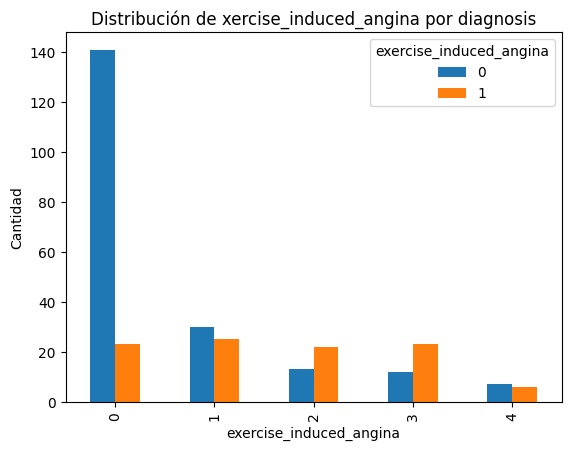

In [47]:
grouped_data = subset.groupby(['diagnosis', 'exercise_induced_angina']).size().unstack(fill_value=0)
grapf = grouped_data.plot(kind='bar', title='Distribución de xercise_induced_angina por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('exercise_induced_angina')
plt.ylabel('Cantidad')
plt.show()

#### slope

<Axes: title={'center': 'slope'}, xlabel='slope'>

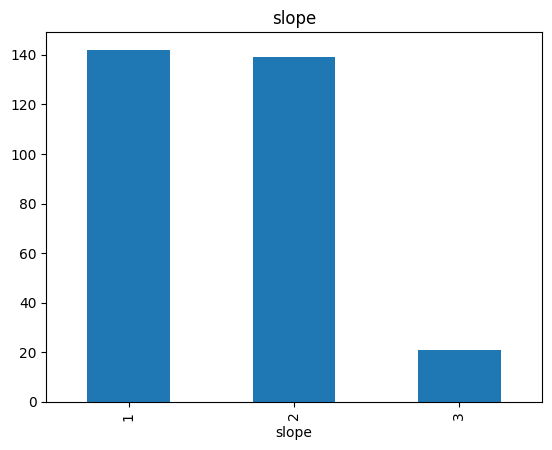

In [48]:
subset.slope.value_counts().plot.bar(title='slope')

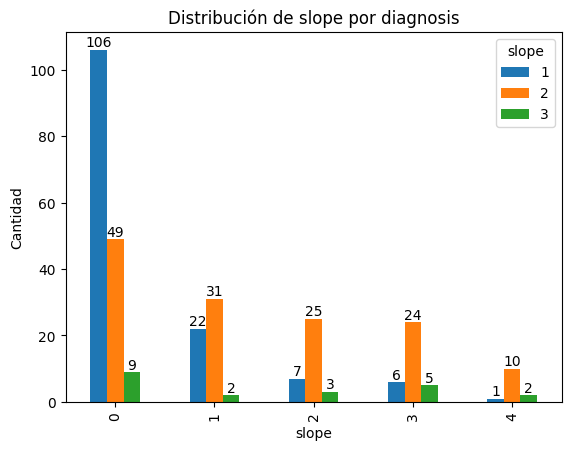

In [49]:
grouped_data = subset.groupby(['diagnosis', 'slope']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de slope por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('slope')
plt.ylabel('Cantidad')
plt.show()

Si recordamos, slope es la pendiente del segmento ST en el pico de ejercicio. Si es ascendente (valor 1) es el valor menos procupante a la hora de tener que indicar alguna enfermedad cardiaca, por lo contrario, el valor 3 si es preocupante porque indica que la pendiente es descendente, y el valor 2 es plano, lo cual es ligeramente preocupante.

Podemos observar, de esta manera, que se corresponde con lo que nos indica el gráfico, ya que a medida que aumenta la gavedad de la enfermedad cardiaca, se muestra predominante el valor de ST plano.

Se puede observar correlación entre la pendiente ST y la gravedad de la enfermedad.

#### Vessels colored fl

In [50]:
subset.vessels_colored_fl.sample(10)

4      0.0
43     0.0
42     2.0
91     3.0
103    1.0
32     0.0
97     2.0
181    2.0
285    3.0
53     0.0
Name: vessels_colored_fl, dtype: float64

Aca tenemos un problema, el tipo de variable de 'vessels_colored_fl' es float, pero los datos adentro son todos enteros, asi que seran transformados en int.

In [51]:
subset['vessels_colored_fl'] = subset['vessels_colored_fl'].astype(int)

<Axes: xlabel='vessels_colored_fl'>

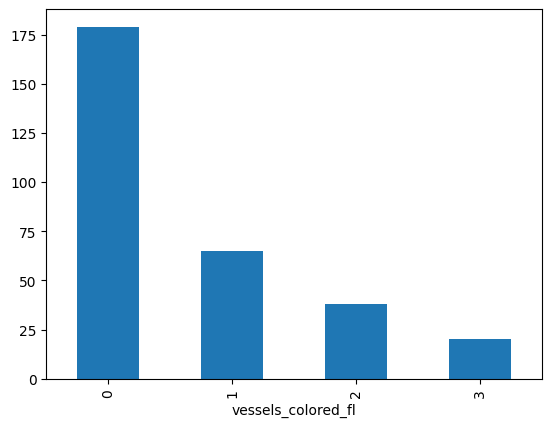

In [52]:
subset.vessels_colored_fl.value_counts().plot.bar()

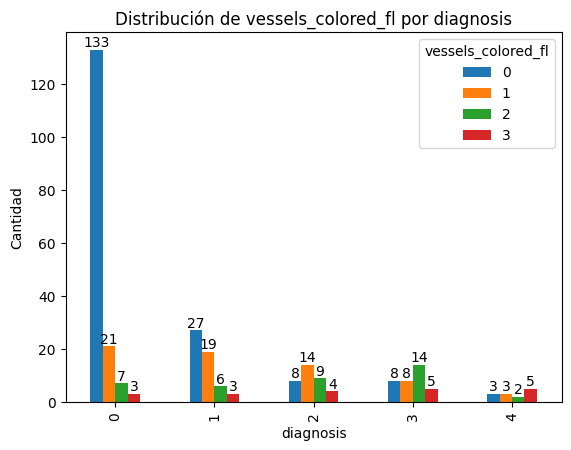

In [53]:
grouped_data = subset.groupby(['diagnosis', 'vessels_colored_fl']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de vessels_colored_fl por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

Se evidencia que aquellos que no poseen enfermedad cardiaca, son aquellos que no poseen vasos principales bloqueados. Por lo que a medida que aumenta la gravedad de la enfermedad cardiaca, disminuye. 

#### Thalassemia

Los valores de "thalassemia" son enteros, solo que en el dataframe se encuentran almacenados como float, entonces a la hora de realizar el gráfico aparecen un par de errores. 

In [54]:
subset["thalassemia"] = subset["thalassemia"].astype(int)

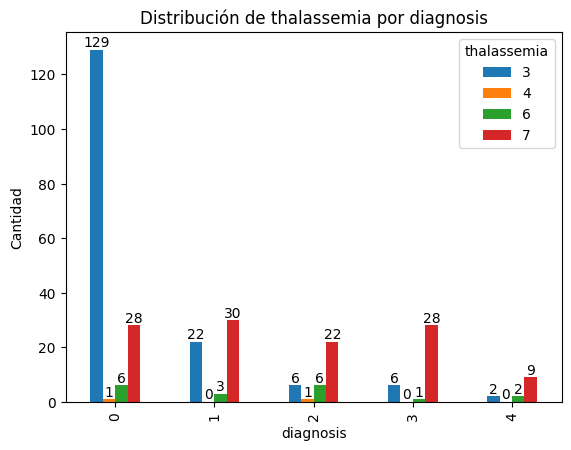

In [55]:
grouped_data = subset.groupby(['diagnosis', 'thalassemia']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de thalassemia por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Max_heart_rate

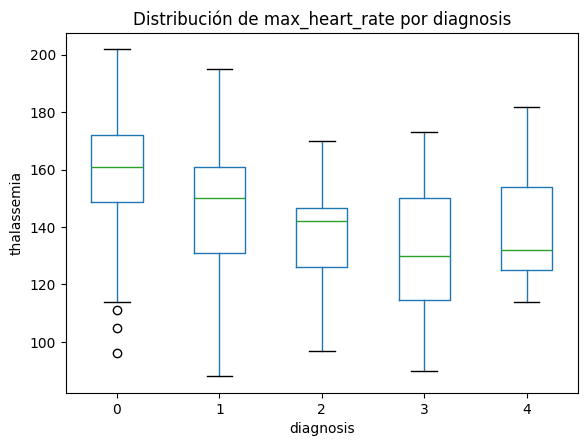

In [56]:
subset.boxplot(column='max_heart_rate', by='diagnosis', grid=False)

plt.title('Distribución de max_heart_rate por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('thalassemia')
plt.show()

#### Cholesterol_level

<Axes: xlabel='cholesterol_level'>

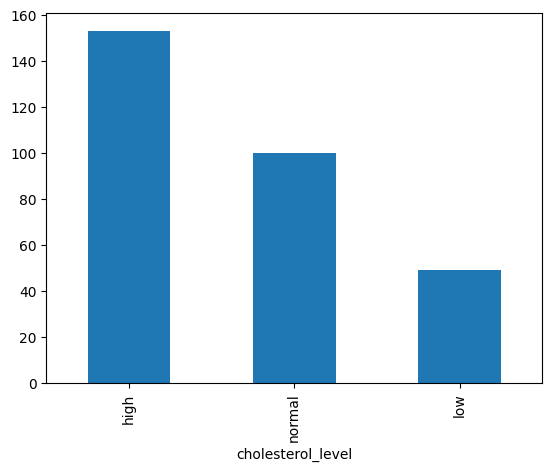

In [57]:
subset.cholesterol_level.value_counts().plot.bar()

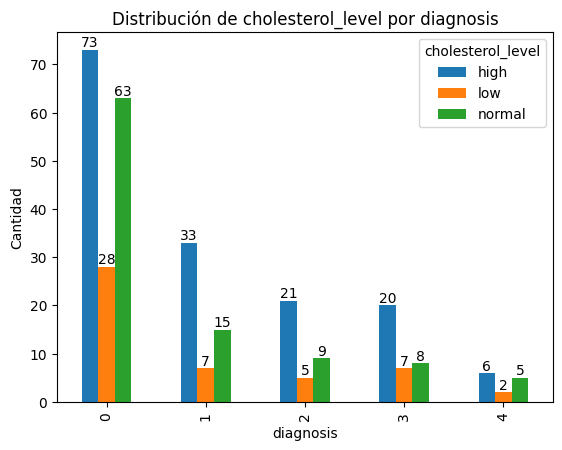

In [58]:
grouped_data = subset.groupby(['diagnosis', 'cholesterol_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de cholesterol_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Blood_pressure_level

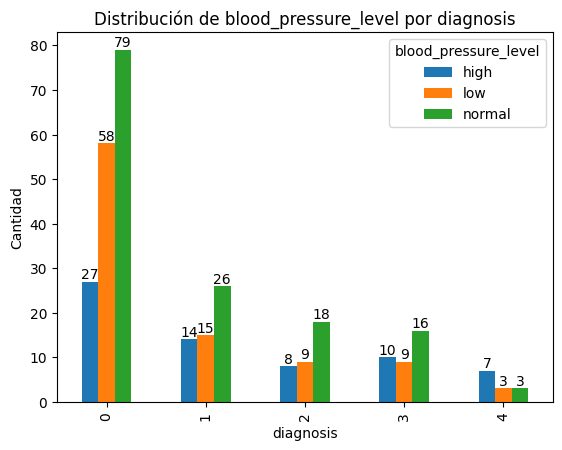

In [59]:
grouped_data = subset.groupby(['diagnosis', 'blood_pressure_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de blood_pressure_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Risk_score

In [60]:
fig = px.box(subset, y='risk_score')
fig.show()

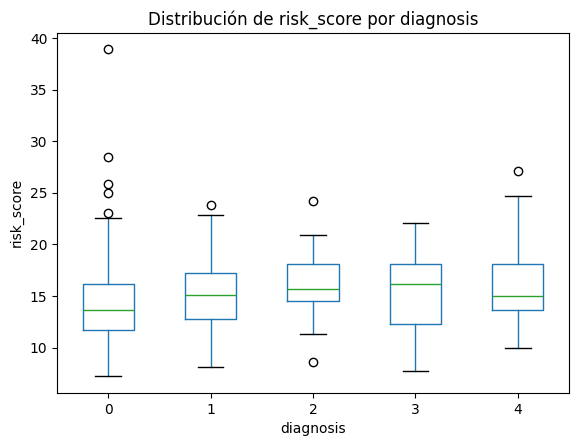

In [61]:
bxp = subset.boxplot(column='risk_score', by='diagnosis', grid=False)

plt.title('Distribución de risk_score por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_score')
plt.show()

#### Risk_factor

In [62]:
fig = px.box(subset, y='risk_factor')
fig.show()

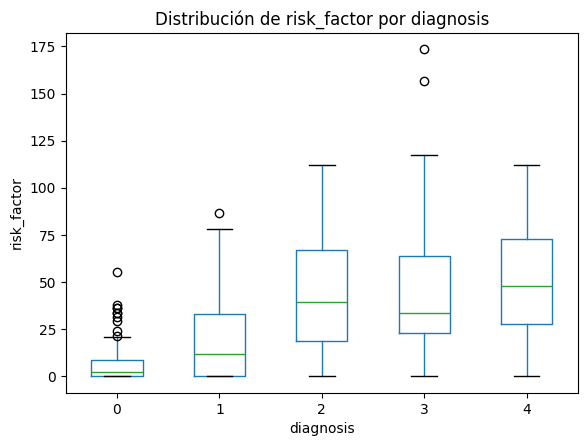

In [63]:
bxp = subset.boxplot(column='risk_factor', by='diagnosis', grid=False)

plt.title('Distribución de risk_factor por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_factor')
plt.show()

#### Symptom_severity

In [64]:
fig = px.box(subset, y='symptom_severity')
fig.show()

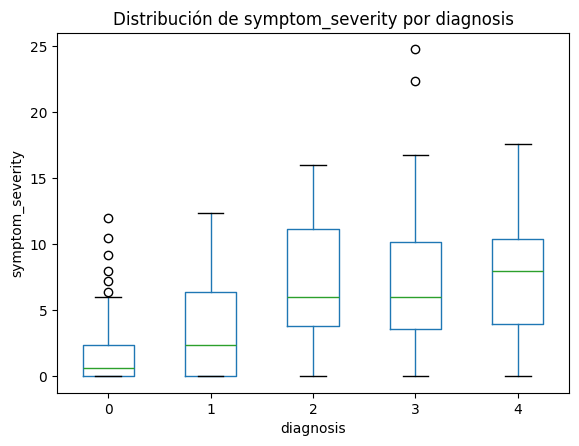

In [65]:
bxp = subset.boxplot(column='symptom_severity', by='diagnosis', grid=False)

plt.title('Distribución de symptom_severity por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('symptom_severity')
plt.show()

#### Avg_chol_by_age_group

In [66]:
fig = px.box(subset, y='avg_chol_by_age_group')
fig.show()

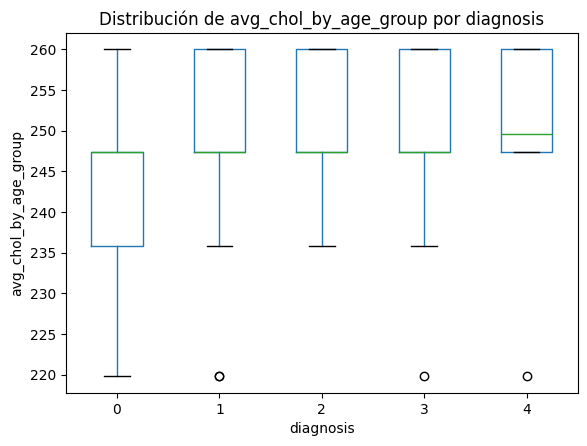

In [67]:
bxp = subset.boxplot(column='avg_chol_by_age_group', by='diagnosis', grid=False)

plt.title('Distribución de avg_chol_by_age_group por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('avg_chol_by_age_group')
plt.show()

In [68]:
valor_unicos_age_group = subset['age_group'].unique()
vu_chol =  subset['cholesterol_level'].unique()
vu_bp = subset['blood_pressure_level'].unique()

C:\Users\lucas\AppData\Local\Temp\ipykernel_22076\372916479.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\lucas\AppData\Local\Temp\ipykernel_22076\372916479.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\lucas\AppData\Local\Temp\ipykernel_22076\372916479.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

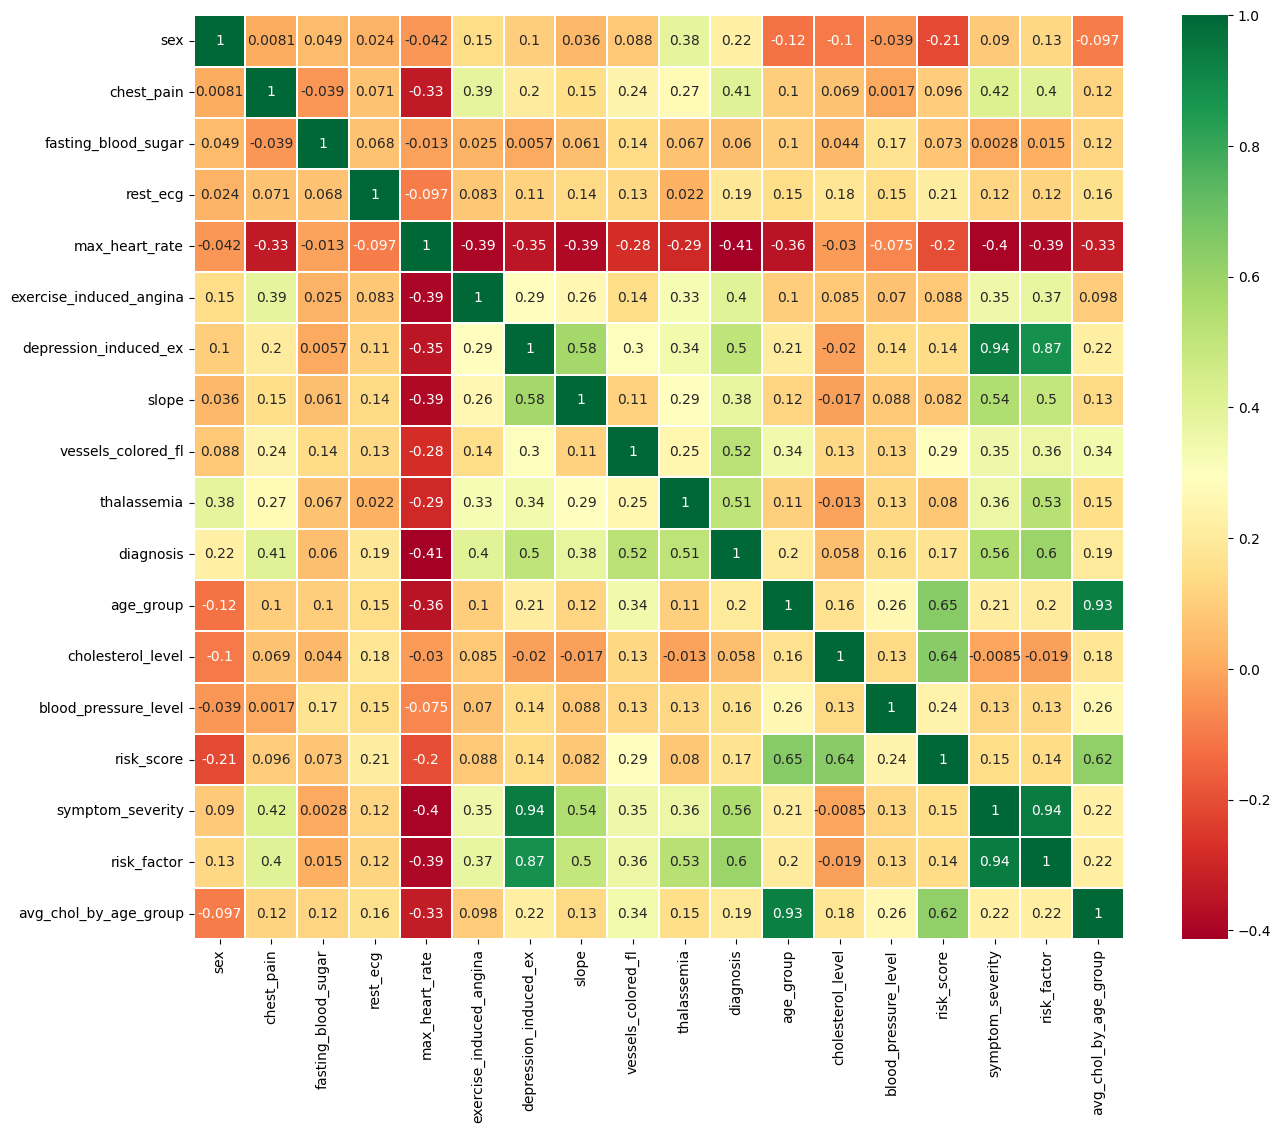

In [69]:
subset["age_group"] = subset.age_group.replace(valor_unicos_age_group, [60, 30, 40, 50, 70])
subset['cholesterol_level'] = subset.cholesterol_level.replace(vu_chol, [1, 2, 0])
subset['blood_pressure_level'] = subset.blood_pressure_level.replace(vu_bp, [2,0,1])
sns.heatmap(subset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

**Menor relacion con diagnosis**
1. **Max_heart_rate** tiene una baja correlacion con **diagnosis**, que es nuestra variable de salida. Esto nos lleva a entender que max_heart_rate no afecta a la hora de determinar el diagnostico. Además podemos ver que **Max_heart_rate** tiene una baja relación con el resto de variables por lo que nos lleva a pensar de que se pueda eleminar del dataset. 

**Estas son las variables con mayor correlacion con diagnosis**
Consideramos que empieza haber cierta correlacion a partir de 0.40.

1. **chest_pain** 0.4
2. **exercise_induced_angina** 0.44
3. **depression_induced_ex** 0.43
4. **vessel_coloured_fl** 0.46
5. **thalassemia** 0.53
6. **symptom_severity** 0.49
7. **risk_factor** 0.54

**Una vez identificadas estas variables, queremos saber con que otras variables poseen una mayor correlación aparte de diagnosis**
1. **chest_pain**
- risk_factor - 0.42
- symptom_severity - 0.42

2. **exercise_induced_angina**
- risk_factor - 0.41

3. **depression_induced_ex**
- slope - 0.54
- symptom_severity - 0.94
- risk_factor - 0.84

5. **thalassemia**
- risk_factor - 0.54

6. **symptom_severity**
- risk_factor - 0.93
- slope - 0.51
- depression_induced_ex - 0.94
- chest_pain - 0.42

7. **risk_factor**
- symptom_severity - 0.93
- chest_pain - 0.42
- exercise_induced_angina - 0.41
- depression_induced_ex - 0.84
- thalassemia - 0.54

Para el resto de variables que no muestran algun signo de generar una alta influencia en diagnosis, se van a probar con eliminarlas del dataset y evaluar si influye considerablemente en el resultado. 

### Listado de posibles dudas/preguntas al encargado de proveer los datos

1. ¿Que tan fiable son los datos?
2. ¿Por qué hay tantos outliners en las siguientes variables risk_score, risk_factor, symptom_severity y avg_chol_by_age_group? 

## 3- Hipótesis sobre los datos

### a. Formulación de hipótesis sobre la variable target bajo determinadas condiciones

1. En la variable **chest_pain** se piensa que esta puede no influir a la hora de predecir si hay o no alguna enfermedad cardiaca.
2. En la variable **fasting_blood_sugar** se piensa que puede no influir a la hora de predecir si hay o no alguna enfermedad cardiaca. No se termina de saber si al ser true nos asegure que pueda haber algun tipo de enfemerdad cardiaca. 
3. Planteamos que las variables mencionadas como aquellas con mayor relación son las que más van a influir con el resultado final de diagnosis y a su vez, cada una de estas variables estan relacionadas con otras variables que se consideraran importantes a la hora de obtener el diagnosis.
4. **Max_heart_rate** no tiene una correlación con diagnosis, por lo que esta variable no tiene importancia para diagnosis.
 

### b. Comprobación de la hipótesis

### c. Creación de nuevas variables

## 4- Modelado

Dividimos el conjunto de datos en train, validation y test

In [70]:
from sklearn.model_selection import train_test_split

train, not_train = train_test_split(subset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

train.shape, validation.shape, test.shape

((181, 18), (60, 18), (61, 18))

Generamos nuestro mapper

In [71]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder

mapper = DataFrameMapper([
    (['sex'], [OneHotEncoder()]),
    (['chest_pain'], [StandardScaler()]),
    (['fasting_blood_sugar'], [OneHotEncoder()]),
    (['rest_ecg'], [StandardScaler()]),
    (['max_heart_rate'], [StandardScaler()]),
    (['exercise_induced_angina'], [OneHotEncoder()]),
    (['depression_induced_ex'], [StandardScaler()]),
    (['slope'], [StandardScaler()]),
    (['vessels_colored_fl'], [StandardScaler()]),
    (['thalassemia'], [StandardScaler()]),
    (['age_group'], [OneHotEncoder()]),
    (['cholesterol_level'], [OneHotEncoder()]),
    (['blood_pressure_level'], [OneHotEncoder()]),
    (['risk_score'], [StandardScaler()]),
    (['symptom_severity'], [StandardScaler()]),
    (['risk_factor'], [StandardScaler()]),
    (['avg_chol_by_age_group'], [StandardScaler()])
])

mapper.fit(train)

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



DataFrameMapper(drop_cols=[],
                features=[(['sex'], [OneHotEncoder()]),
                          (['chest_pain'], [StandardScaler()]),
                          (['fasting_blood_sugar'], [OneHotEncoder()]),
                          (['rest_ecg'], [StandardScaler()]),
                          (['max_heart_rate'], [StandardScaler()]),
                          (['exercise_induced_angina'], [OneHotEncoder()]),
                          (['depression_induced_ex'], [StandardScaler()]),
                          (['slope'], [StandardScaler()]),
                          (['...red_fl'], [StandardScaler()]),
                          (['thalassemia'], [StandardScaler()]),
                          (['age_group'], [OneHotEncoder()]),
                          (['cholesterol_level'], [OneHotEncoder()]),
                          (['blood_pressure_level'], [OneHotEncoder()]),
                          (['risk_score'], [StandardScaler()]),
                          (['symptom_severity'], [StandardScaler()]),
                          (['risk_factor'], [StandardScaler()]),
                          (['avg_chol_by_age_group'], [StandardScaler()])])

Vemos como realiza las transformaciones

In [72]:
sample = subset.sample(5, random_state=42)

mapper.transform(sample)

array([[ 0.        ,  1.        , -0.09486997,  0.        ,  1.        ,
         1.00277393,  1.026384  ,  1.        ,  0.        , -0.8136304 ,
        -0.92371117,  2.62321944, -0.88270886,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        , -0.10576131,
        -0.71630829, -0.62636242,  0.0651326 ],
       [ 0.        ,  1.        ,  0.91521619,  1.        ,  0.        ,
         1.00277393, -2.12235336,  0.        ,  1.        , -0.8136304 ,
         0.74820605,  0.4148347 , -0.88270886,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        , -0.6473259 ,
        -0.71630829, -0.62636242,  0.0651326 ],
       [ 0.        ,  1.        ,  0.91521619,  0.        ,  1.        ,
         1.00277393, -0.37843728,  0.        ,  1.        ,  0.19504838,
         0.74820605,  0.4148

In [73]:
mapper.transformed_names_

['sex_0',
 'sex_1',
 'chest_pain',
 'fasting_blood_sugar_0',
 'fasting_blood_sugar_1',
 'rest_ecg',
 'max_heart_rate',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'depression_induced_ex',
 'slope',
 'vessels_colored_fl',
 'thalassemia',
 'age_group_0',
 'age_group_1',
 'age_group_2',
 'age_group_3',
 'age_group_4',
 'cholesterol_level_0',
 'cholesterol_level_1',
 'cholesterol_level_2',
 'blood_pressure_level_0',
 'blood_pressure_level_1',
 'blood_pressure_level_2',
 'risk_score',
 'symptom_severity',
 'risk_factor',
 'avg_chol_by_age_group']

Generamos el Pipeline

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline

import numpy as np

# Binarizamos las etiquetas para cada clase (0, 1, 2, 3, 4)
train_y_binarized = label_binarize(train.diagnosis, classes=[0, 1, 2, 3, 4])

# Creamos un diccionario para almacenar los modelos
models = {}

# Entrenamos un modelo para cada clase (One-vs-Rest)
for class_idx in range(5):
    pipeLR = Pipeline([
        ('mapper', mapper),
        ('classifier', LogisticRegression(random_state=42, max_iter=500))  # Aumentar max_iter
    ])
    pipeLR.fit(train, train_y_binarized[:, class_idx]) # Segun el indice entrena para una clase. Ej: class_idx = 1 --> entrena para predecidr a la clase 1
    models[class_idx] = pipeLR

# Predecir probabilidades para el conjunto de test
def predict_probabilities(models, test_data):
    probabilities = {}
    for class_idx, model in models.items():
        prob = model.predict_proba(test_data)[:, 1]  # Probabilidad de que sea la clase actual
        probabilities[class_idx] = prob
    return probabilities

# Obtener las probabilidades para cada clase
probs = predict_probabilities(models, validation)

# Mostrar probabilidades para un ejemplo del test
print("Probabilidades para el primer ejemplo del test:")
for class_idx, prob in probs.items():
    print(f"Clase {class_idx}: {prob[0]:.4f}")


c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Probabilidades para el primer ejemplo del test:
Clase 0: 0.0700
Clase 1: 0.3912
Clase 2: 0.1960
Clase 3: 0.0687
Clase 4: 0.0489


In [112]:
probs_df = pd.DataFrame(probs)

# Mostrar las primeras filas con valores formateados a 4 decimales
print(probs_df.map(lambda x: f"{x:.4f}"))

         0       1       2       3       4
0   0.0700  0.3912  0.1960  0.0687  0.0489
1   0.8716  0.0732  0.0377  0.0173  0.0058
2   0.0088  0.0260  0.2945  0.4608  0.5379
3   0.6752  0.1127  0.0484  0.0556  0.0199
4   0.7890  0.1624  0.0198  0.0371  0.0332
5   0.0062  0.3283  0.2947  0.4783  0.0716
6   0.1714  0.0121  0.0582  0.7580  0.0111
7   0.0997  0.1360  0.0950  0.2752  0.0366
8   0.3209  0.0742  0.1171  0.6630  0.0087
9   0.0053  0.2992  0.3287  0.3468  0.1253
10  0.8980  0.0699  0.0304  0.0061  0.0200
11  0.0239  0.2009  0.1849  0.2482  0.0772
12  0.0745  0.1777  0.0784  0.2275  0.0306
13  0.5846  0.1769  0.0183  0.0292  0.1072
14  0.8370  0.1211  0.0165  0.0270  0.0166
15  0.0339  0.0785  0.3288  0.8117  0.0287
16  0.7703  0.2803  0.0241  0.0122  0.0142
17  0.3603  0.0183  0.2020  0.1825  0.0010
18  0.9028  0.1192  0.0198  0.0132  0.0017
19  0.9795  0.0193  0.0754  0.0148  0.0004
20  0.9793  0.2452  0.0061  0.0020  0.0029
21  0.9037  0.1184  0.0091  0.0129  0.0032
22  0.0167 

In [92]:
from sklearn import metrics

print(metrics.classification_report(validation.diagnosis, probs))

ValueError: Found input variables with inconsistent numbers of samples: [60, 5]

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['sex'], [OneHotEncoder()]),
                                           (['chest_pain'], [StandardScaler()]),
                                           (['fasting_blood_sugar'],
                                            [OneHotEncoder()]),
                                           (['rest_ecg'], [StandardScaler()]),
                                           (['max_heart_rate'],
                                            [StandardScaler()]),
                                           (['exercise_induced_angina'],
                                            [OneHotEncoder()]),
                                           (['depression_induced_ex'],
                                            [StandardScaler()]),
                                           (['slope...
                                            [StandardScaler()]),
                                           (['age_group'], [OneHotEncoder()]),
                                           (['cholesterol_level'],
                                            [OneHotEncoder()]),
                                           (['blood_pressure_level'],
                                            [OneHotEncoder()]),
                                           (['risk_score'], [StandardScaler()]),
                                           (['symptom_severity'],
                                            [StandardScaler()]),
                                           (['risk_factor'],
                                            [StandardScaler()]),
                                           (['avg_chol_by_age_group'],
                                            [StandardScaler()])])),
                ('classifier', LogisticRegression(random_state=42))])

Predecimos

In [75]:
y_predLR = pipeLR.predict(validation)

y_predLR

array([1, 0, 4, 0, 0, 3, 3, 3, 3, 2, 0, 3, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 3, 1, 0, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0,
       0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 3, 2, 0, 3], dtype=int64)

Ahora se evaluarán las metricas

In [76]:
from sklearn import metrics

print(metrics.classification_report(validation.diagnosis, y_predLR))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.25      0.13      0.17        15
           2       0.33      0.22      0.27         9
           3       0.23      0.43      0.30         7
           4       0.00      0.00      0.00         1

    accuracy                           0.55        60
   macro avg       0.33      0.34      0.32        60
weighted avg       0.52      0.55      0.52        60



Claramente no parece ser un problema para resolver con logisitc regression.

Probaremos con k-NN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN = pipeKNN.predict(validation)

y_predKNN

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 0, 2, 0, 0, 3, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2], dtype=int64)

In [78]:
print(metrics.classification_report(validation.diagnosis, y_predKNN))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        28
           1       0.50      0.13      0.21        15
           2       0.36      0.44      0.40         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.57        60
   macro avg       0.31      0.32      0.28        60
weighted avg       0.50      0.57      0.49        60



c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Modificaremos el valor devuelto por 'diagnosis', de manera que tendremos solo dos resultados posibles [0,1]
0: sin enfermedad
1: con enfermedad

In [79]:
# subset['diagnosis'] = subset['diagnosis'].apply(lambda x: 1 if x > 1 else x)

# subset.diagnosis

Realiazamos la sepracion de los datos

In [80]:
train, not_train = train_test_split(subset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

Generamos la nueva Pipeline con LogisticRegression y k-NN para comparar

In [81]:
pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

y_predLR_train = pipeLR.predict(train)
y_predLR_validation = pipeLR.predict(validation)

y_predLR_validation

c:\Users\lucas\Repos\ML-tp\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([1, 0, 4, 0, 0, 3, 3, 3, 3, 2, 0, 3, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 3, 1, 0, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0,
       0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 3, 2, 0, 3], dtype=int64)

Evaluamos las metricas

In [82]:
print(metrics.classification_report(validation.diagnosis, y_predLR_validation))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.25      0.13      0.17        15
           2       0.33      0.22      0.27         9
           3       0.23      0.43      0.30         7
           4       0.00      0.00      0.00         1

    accuracy                           0.55        60
   macro avg       0.33      0.34      0.32        60
weighted avg       0.52      0.55      0.52        60



ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

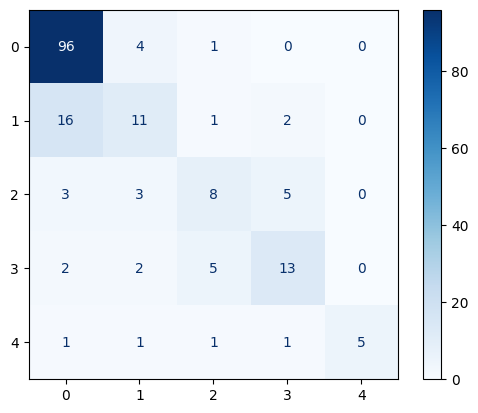

In [83]:
cm = metrics.confusion_matrix(train.diagnosis, y_predLR_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

In [ ]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predLR_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con los datos de 'diagnosis' modificados, las predicciones son mas precisas.

In [ ]:
K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN_train = pipeKNN.predict(train)
y_predKNN_validation = pipeKNN.predict(validation)

y_predKNN_validation

In [ ]:
print(metrics.classification_report(validation.diagnosis, y_predKNN_validation))

In [ ]:
cm = metrics.confusion_matrix(train.diagnosis, y_predKNN_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

In [ ]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predKNN_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con un KNN con k=10 vemos que es peor que Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier(n_neighbors=1)
parameters = {'n_neighbors': [1, 3, 5, 10, 15, 20, 50, 100]}

clf = GridSearchCV(knn_clf, parameters, refit=True, verbose=1)

gs_pipe = Pipeline([
    ('mapper', mapper),
    ('classifier', clf),
])

gs_pipe.fit(train, train.diagnosis)

clf.best_score_, clf.best_params_

In [ ]:
K=15

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])

pipeKNN.fit(train, train.diagnosis)

kNN_train = pipeKNN.predict(train)
kNN_validation = pipeKNN.predict(validation)

kNN_validation

In [ ]:
print(metrics.classification_report(validation.diagnosis, kNN_validation))

Una vez evaluado el modelo con Logistic Regression y con k-NN con un k=15 vemos que el Logistic Regression tiene una mayor acuracy [LogisticRegression: 83, k-NN: 78]